In [1]:
import sys, os, glob, pickle, toml, json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature

def set_background(ax):
    ax.set_extent([-121, -72, 25, 50])

    # Background boundaries
    # ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray')
    
    return ax


def cal_ratio_within_bins(data, bins):
    binsc = np.zeros(len(bins)-1)
    ratio = np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        indi = (data>bins[i]) & (data<=bins[i+1])
        ratio[i] = np.sum(indi)/np.sum(~np.isnan(data))
        binsc[i] = (bins[i]+bins[i+1])/2
    return binsc, ratio

In [2]:
# load info
infile_basin_info = f"/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv"
df_info = pd.read_csv(infile_basin_info)

inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'

In [3]:
# LSE metrics
kge_defa = []
for tarbasin in range(len(df_info)):
    infile = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_trial0/evaluation_many_metrics.csv'    
    dfi = pd.read_csv(infile)
    kge_defa.append(dfi['kge'].values)

kge_defa = np.squeeze(np.array(kge_defa))

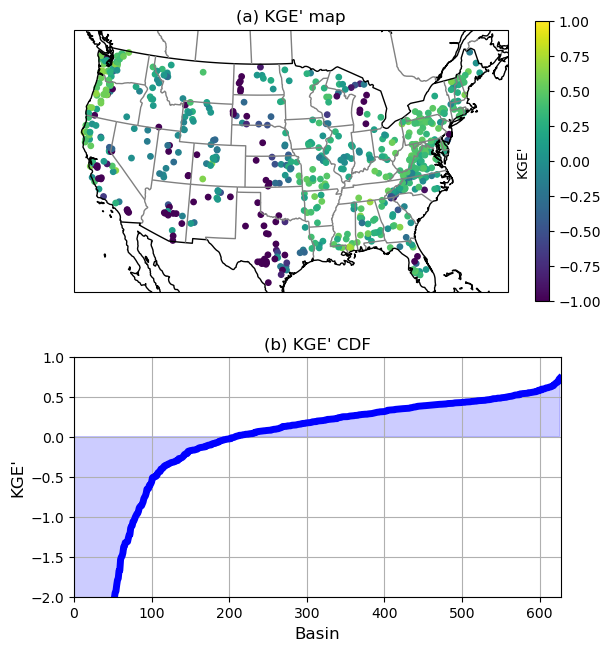

In [4]:

lat, lon = df_info['lat_cen'].values, df_info['lon_cen'].values

fig = plt.figure(figsize=[7, 8])

proj = ccrs.AlbersEqualArea(central_longitude=-100)
transf = ccrs.PlateCarree()

ax = fig.add_subplot(2, 1, 1, projection=proj)
ax = set_background(ax)
p = ax.scatter(lon, lat, 15, kge_defa,  vmin = -1, vmax=1, transform=transf)
ax.set_title("(a) KGE' map")
cax = plt.colorbar(p, ax=ax, location='right', shrink=1, label="KGE'", pad=0.05)
cax.ax.yaxis.set_ticks_position('right')
cax.ax.yaxis.set_label_position('left')



ax4 = fig.add_subplot(2, 1, 2)
ax4.plot(np.sort(kge_defa), 'b-', linewidth=5, label="KGE'")
ax4.fill_between(range(len(kge_defa)), np.sort(kge_defa), alpha=0.2, color='blue')
ax4.set_xlabel('Basin', fontsize=12)
ax4.set_ylabel("KGE'", fontsize=12)
ax4.set_ylim(-2, 1)
ax4.set_xlim(0, 627)
ax4.grid(True)
ax4.set_title("(b) KGE' CDF")


pos = list(ax4.get_position().bounds)
pos[3] = pos[3] - 0.05
pos[2] = pos[2] - 0.08
pos[1] = pos[1] + 0.05
pos[0] = pos[0] + 0.0

ax4.set_position(pos)


# plt.tight_layout()
plt.savefig('CTSM_defa_daily_Q_KGE.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()